In [12]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Read in file
file = "Resources/NFL Arrest CSV.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(10) #956, 8

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...
5,12/3/2019,DAL,Antwaun Woods,DT,Arrested,Drugs,"Pulled over for speeding in Frisco, Texas, and...",Resolution undetermined
6,11/19/2019,MIA,Mark Walton,RB,Arrested,Domestic violence,Police say he punched his pregnant girlfriend ...,Resolution undetermined. Team released him sam...
7,11/6/2019,DAL,Daniel Ross,DT,Arrested,"Drugs, gun",Accused of marijuana possession and unlawful c...,Resolution undetermined.
8,10/27/2019,MIN,Jayron Kearse,S,Arrested,"DUI, drugs","Accused of driving drunk in Minneapolis, with ...",Resolution undetermined.
9,10/26/2019,MIN,Davion Davis,WR,Arrested,DUI,"Pulled over for speeding in St. Paul, Minn., a...",Resolution undetermined.


In [4]:
df.CATEGORY = df.CATEGORY.str.lower()

In [4]:
df[["Crime 1", "Crime 2", "Crime 3"]] = df.CATEGORY.str.split(",", expand=True)
df["crime_list"] = df.CATEGORY.str.split(",")
df["crime_count"] = df.crime_list.str.len()
df.head()

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME,Crime 1,Crime 2,Crime 3,crime_list,crime_count
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.,drugs,None,None,[drugs],1
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.,battery,None,None,[battery],1
2,1/11/2020,NE,Julian Edelman,WR,Arrested,vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.,vandalism,None,None,[vandalism],1
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.,domestic violence,None,None,[domestic violence],1
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...,disorderly conduct,None,None,[disorderly conduct],1


In [5]:
df_col_names = ['date', 'team', 'player', 'position', 'status', 'crimeraw', 
                'desc', 'outcome', 'crime1', 'crime2', 'crime3', 'crime_list', 'crime_count']
df.columns = df_col_names
df

,date,team,player,position,status,crimeraw,desc,outcome,crime1,crime2,crime3,crime_list,crime_count
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.,drugs,None,None,[drugs],1
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.,battery,None,None,[battery],1
2,1/11/2020,NE,Julian Edelman,WR,Arrested,vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.,vandalism,None,None,[vandalism],1
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.,domestic violence,None,None,[domestic violence],1
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...,disorderly conduct,None,None,[disorderly conduct],1
5,12/3/2019,DAL,Antwaun Woods,DT,Arrested,drugs,"Pulled over for speeding in Frisco, Texas, and...",Resolution undetermined,drugs,None,None,[drugs],1
6,11/19/2019,MIA,Mark Walton,RB,Arrested,domestic violence,Police say he punched his pregnant girlfriend ...,Resolution undetermined. Team released him sam...,domestic violence,None,None,[domestic violence],1
7,11/6/2019,DAL,Daniel Ross,DT,Arrested,"drugs, gun",Accused of marijuana possession and unlawful c...,Resolution undetermined.,drugs,gun,None,"[drugs, gun]",2
8,10/27/2019,MIN,Jayron Kearse,S,Arrested,"dui, drugs","Accused of driving drunk in Minneapolis, with ...",Resolution undetermined.,dui,drugs,None,"[dui, drugs]",2
9,10/26/2019,MIN,Davion Davis,WR,Arrested,dui,"Pulled over for speeding in St. Paul, Minn., a...",Resolution undetermined.,dui,None,None,[dui],1


In [6]:
df.to_csv('Resources/clean.csv', index=False)

In [7]:
offense = ['WR', 'RB', 'OT', 'TE', 'QB', 'OC', 'OG', 'FB', 'K', 'OL', 'C', 'P']
defense = ['CB', 'S', 'DT', 'LB', 'DE', 'DB', 'DT']

In [8]:
offense_crime_df = df.loc[df.position.isin(offense), ["player", "position", "crime_count"]]
offense_crime_df.to_csv('Resources/offense_crime.csv', index=False)
offense_crime_df.head()

,player,position,crime_count
1,Odell Beckham,WR,1
2,Julian Edelman,WR,1
6,Mark Walton,RB,1
9,Davion Davis,WR,1
15,Desmond Harrison,OT,1


In [9]:
defense_crime_df = df.loc[df.position.isin(defense), ["player", "position", "crime_count"]]
defense_crime_df.to_csv('Resources/defense_crime.csv', index=False)
defense_crime_df.head()

,player,position,crime_count
0,Joejuan Williams,CB,1
3,Xavien Howard,CB,1
4,Kameron Kelly,S,1
5,Antwaun Woods,DT,1
7,Daniel Ross,DT,2


In [10]:
#create team count for number of crimes
CrimeCountbyTeam = df.groupby('team').count()['position'].sort_values(ascending=False)
CrimeCountbyTeam

team
MIN           54
DEN           52
CIN           51
CLE           37
TB            37
JAC           37
IND           36
KC            36
TEN           36
MIA           34
CHI           32
BAL           31
SEA           30
GB            29
SF            28
PIT           27
NYJ           27
NO            27
DAL           26
ARI           26
SD            26
NE            24
CAR           24
OAK           23
WAS           23
BUF           22
ATL           22
NYG           21
PHI           20
DET           19
HOU           15
STL           12
LAR            7
Free agent     3
LAC            1
Free Agent     1
Name: position, dtype: int64

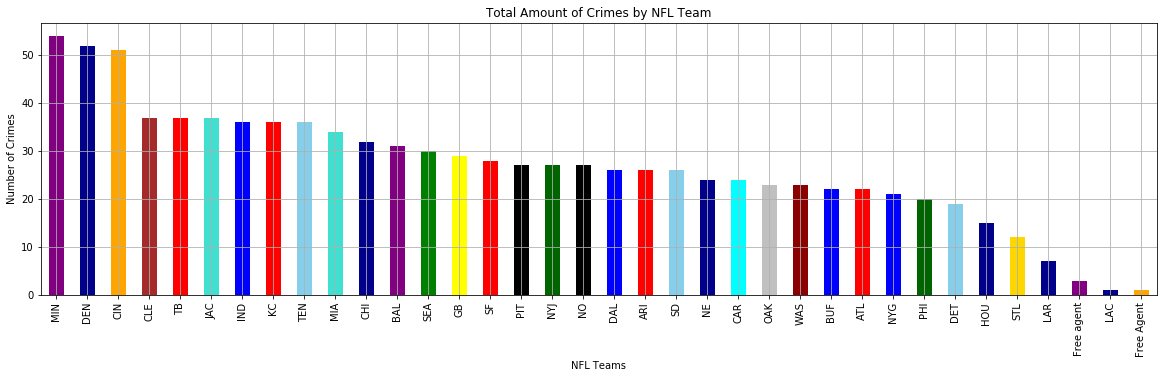

In [14]:
CrimeChart = CrimeCountbyTeam.plot(kind='bar', color=['purple', 'DarkBlue', 'orange', 'brown', 'red', 'turquoise', 'blue', 'red', 'skyblue', 'turquoise', 'darkblue', 'purple', 'green', 'yellow', 'red', 'black', 'darkgreen', 'black', 'blue', 'red', 'skyblue', 'darkblue', 'cyan', 'silver', 'darkred', 'blue', 'red', 'blue', 'darkgreen', 'skyblue', 'darkblue', 'gold', 'darkblue'], title='Total Amount of Crimes by NFL Team', grid=True, figsize=(20,5))
CrimeChart.set_xlabel("NFL Teams")
CrimeChart.set_ylabel("Number of Crimes")
plt.show()